In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv('crop_recommendation.csv')

In [63]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,8.239633,1.995722,20.879744,82.002744,6.502985,9.699522,rice
1,85,9.609952,1.984739,21.770462,80.319644,7.038096,10.034490,rice
2,60,9.372583,2.000958,23.004459,82.320763,7.840207,10.509213,rice
3,74,7.538128,1.978972,26.491096,80.158363,6.980401,10.247783,rice
4,78,8.239633,1.990319,20.130175,81.604873,7.628473,10.494232,rice
...,...,...,...,...,...,...,...,...
95,88,8.608704,1.990319,22.683191,83.463583,6.604993,9.569349,rice
96,93,8.697872,1.960435,21.533463,82.140041,6.500343,10.875388,rice
97,60,9.372583,2.006036,21.408658,83.329319,5.935745,10.782880,rice
98,78,7.538128,2.000958,26.543481,84.673536,7.072656,9.403140,rice


In [62]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,8.046997,1.908015,27.309018,55.196224,6.348316,8.659399,coffee
2191,118,7.098142,1.939753,27.548230,62.881792,6.123796,9.367756,coffee
2192,106,5.820619,1.946911,25.627355,57.041511,7.428524,9.481025,coffee
2193,116,7.848384,1.939753,23.292503,50.045570,6.020947,9.400685,coffee
2194,97,7.538128,1.870040,24.914610,53.741447,6.334610,9.114825,coffee
2195,107,7.431124,1.924550,26.774637,66.413269,6.780064,9.308558,coffee
2196,99,4.867023,1.880233,27.417112,56.636362,6.086922,8.382860,coffee
2197,118,7.322189,1.908015,24.131797,67.225123,6.362608,9.234899,coffee
2198,117,7.211228,1.939753,26.272418,52.127394,6.758793,8.366916,coffee
2199,104,5.367500,1.908015,23.603016,60.396475,6.779833,8.648673,coffee


In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.size

17600

In [10]:
df.shape

(2200, 8)

In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [14]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
# Select only the specified columns
columns_to_check = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df_subset = df[columns_to_check]

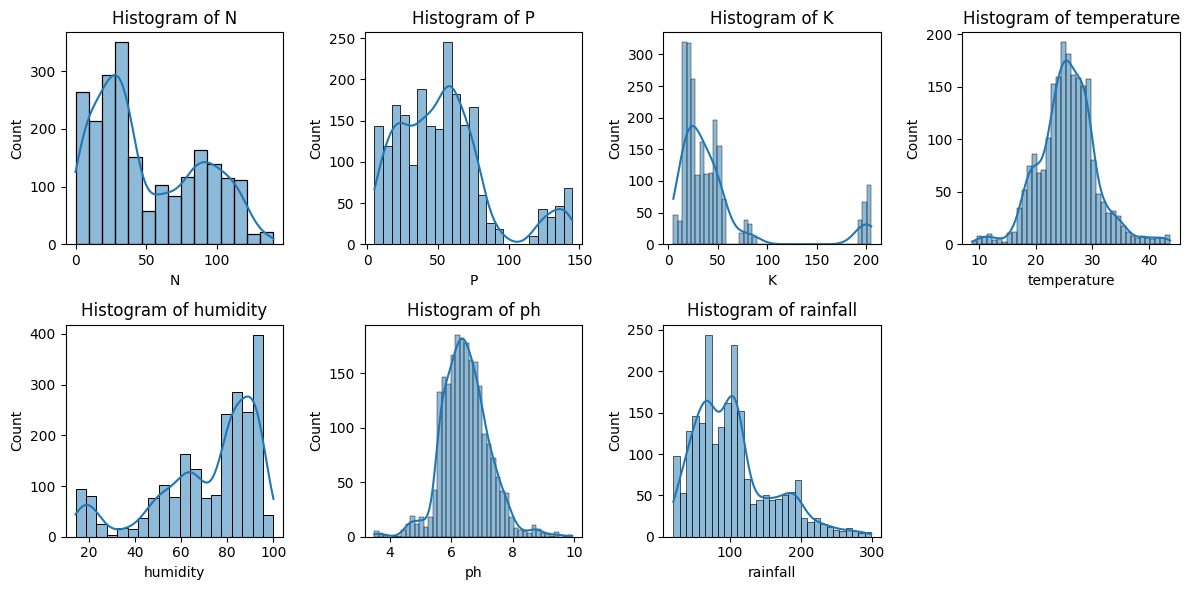

In [17]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Plot histograms for numeric columns
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [18]:

# Compute Z-scores for each numeric column
z_scores_numeric = df[numeric_columns].apply(lambda x: (x - x.mean()) / x.std())

# Define threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Find outlier indices for each numeric column
outlier_indices_numeric = {}
for column in numeric_columns:
    outlier_indices_numeric[column] = np.where(np.abs(z_scores_numeric[column]) > threshold)[0]

# Count outliers for each numeric column
outlier_counts_numeric = {column: len(outlier_indices_numeric[column]) for column in numeric_columns}

# Sort numeric columns by the number of outliers
sorted_numeric_columns_by_outliers = sorted(outlier_counts_numeric.items(), key=lambda x: x[1], reverse=True)

# Print the number of outliers for each numeric column
for column, count in sorted_numeric_columns_by_outliers:
    print(f"Number of outliers in {column}: {count}")


Number of outliers in K: 94
Number of outliers in temperature: 33
Number of outliers in ph: 30
Number of outliers in rainfall: 22
Number of outliers in N: 0
Number of outliers in P: 0
Number of outliers in humidity: 0


<Axes: >

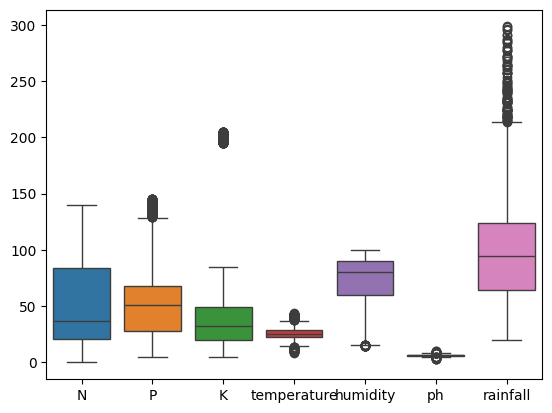

In [19]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns
sns.boxplot(data=df[numeric_columns])

In [20]:
# Calculate Z-scores for each numeric column
z_scores_numeric = df.select_dtypes(include='number').apply(lambda x: np.abs((x - x.mean()) / x.std()))
# Define Z-score threshold for outliers
threshold = 3
# Find outlier indices for each numeric column
outlier_indices_numeric = np.where(z_scores_numeric > threshold)
# Remove rows containing outliers for numeric columns
df_cleaned_numeric = df.drop(outlier_indices_numeric[0])


In [21]:

# Check skewness of features and apply transformations if needed
skewness_cleaned = df_cleaned_numeric.select_dtypes(include='number').apply(lambda x: skew(x))
skewed_features_cleaned = skewness_cleaned[skewness_cleaned > 0.5].index  # Threshold for skewness

print("Skewed features in cleaned DataFrame:", skewed_features_cleaned)

Skewed features in cleaned DataFrame: Index(['P', 'K', 'rainfall'], dtype='object')


In [22]:
# Apply transformations to skewed features
for feature in skewed_features_cleaned:
    transformed_data, _ = boxcox(df[feature] + 1)  # Box-Cox transformation
    df[feature] = transformed_data

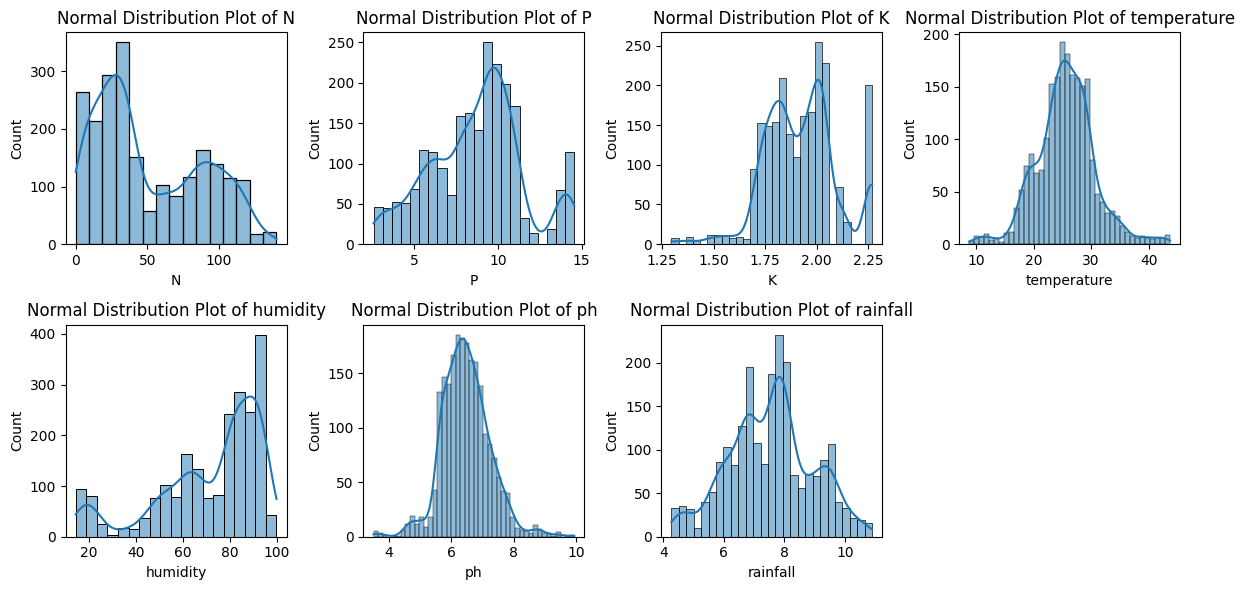

In [23]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Plot normal distribution plots for numeric columns
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Normal Distribution Plot of {column}')
plt.tight_layout()
plt.show()

In [24]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,8.239633,1.995722,20.879744,82.002744,6.502985,9.699522,rice
1,85,9.609952,1.984739,21.770462,80.319644,7.038096,10.034490,rice
2,60,9.372583,2.000958,23.004459,82.320763,7.840207,10.509213,rice
3,74,7.538128,1.978972,26.491096,80.158363,6.980401,10.247783,rice
4,78,8.239633,1.990319,20.130175,81.604873,7.628473,10.494232,rice
...,...,...,...,...,...,...,...,...
2195,107,7.431124,1.924550,26.774637,66.413269,6.780064,9.308558,coffee
2196,99,4.867023,1.880233,27.417112,56.636362,6.086922,8.382860,coffee
2197,118,7.322189,1.908015,24.131797,67.225123,6.362608,9.234899,coffee
2198,117,7.211228,1.939753,26.272418,52.127394,6.758793,8.366916,coffee


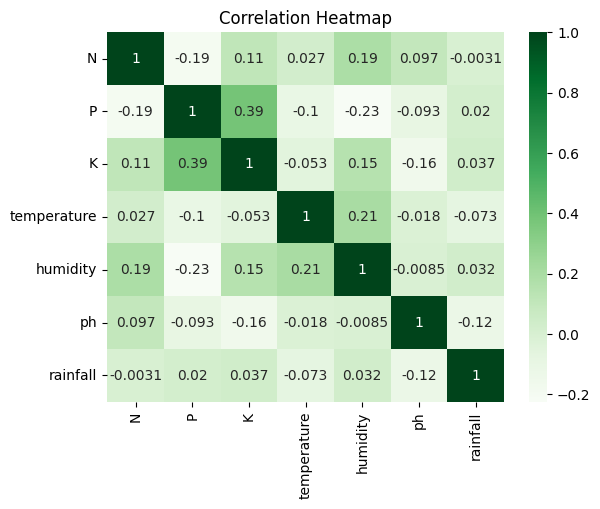

In [25]:
# Filter out all numerical data
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap with green color scheme

sns.heatmap(corr_matrix, annot=True, cmap='Greens')  # Use 'Greens' colormap
plt.title('Correlation Heatmap')
plt.show()

### Seperating features and target label

In [26]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [27]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create model instances
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
}

# Initialize dictionaries to store evaluation metrics
evaluation_metrics = {'Accuracy': {}, 'Precision': {}, 'Recall': {}, 'F1 Score': {}}

# Iterate over each model
for name, model in models.items():
    # Fit the model
    model.fit(Xtrain, Ytrain)
    
    # Make predictions
    y_pred = model.predict(Xtest)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Ytest, y_pred)
    precision = precision_score(Ytest, y_pred, average='weighted')
    recall = recall_score(Ytest, y_pred, average='weighted')
    f1 = f1_score(Ytest, y_pred, average='weighted')
    
    # Store evaluation metrics
    evaluation_metrics['Accuracy'][name] = accuracy
    evaluation_metrics['Precision'][name] = precision
    evaluation_metrics['Recall'][name] = recall
    evaluation_metrics['F1 Score'][name] = f1

# Print evaluation metrics
for metric, values in evaluation_metrics.items():
    print(f"{metric}:")
    for model, value in values.items():
        print(f"{model}: {value}")
    print()


Accuracy:
Naive Bayes: 0.990909090909091
Random Forest: 0.9954545454545455

Precision:
Naive Bayes: 0.9920454545454546
Random Forest: 0.9957575757575757

Recall:
Naive Bayes: 0.990909090909091
Random Forest: 0.9954545454545455

F1 Score:
Naive Bayes: 0.9905627705627705
Random Forest: 0.9953814002089865



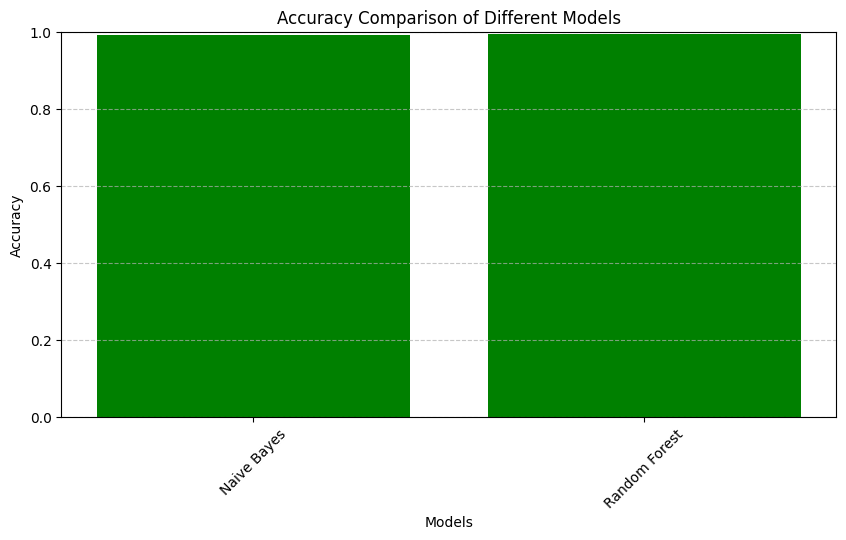

In [107]:
#creating comparision bar chart

# Dictionary to store model accuracies
accuracies = {}

# Iterate over the models dictionary, fit each model to the training data, make predictions on the test data, and calculate the accuracy
for name, model in models.items():
    model.fit(Xtrain, Ytrain)
    y_pred = model.predict(Xtest)
    acc = accuracy_score(Ytest, y_pred)
    accuracies[name] = acc

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(),color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:

rfc = RandomForestClassifier()
rfc.fit(Xtrain,Ytrain)
ypred = rfc.predict(Xtest)
accuracy_score(Ytest,ypred)

0.9954545454545455

# Making recomendation

In [40]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = rfc.predict(data)
print(prediction)

['apple']


In [41]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = rfc.predict(data)
print(prediction)

['apple']


# saving Model

In [42]:
import pickle 
pickle.dump(rfc,open('ml.pkl','wb'))

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForestClassifier with adjusted hyperparameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Train the model
rfc.fit(Xtrain, Ytrain)

# Predictions on the test set
ypred_train = rfc.predict(Xtrain)
ypred_test = rfc.predict(Xtest)

# Calculate accuracy on both training and test sets
accuracy_train = accuracy_score(Ytrain, ypred_train)
accuracy_test = accuracy_score(Ytest, ypred_test)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)



Training Accuracy: 0.9988636363636364
Test Accuracy: 0.990909090909091
